# Project 11-1: Use multiple regression with the diamond data

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

## Tasks

In [2]:
# 1
data = sns.load_dataset('diamonds')

In [3]:
# 2
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
# 3
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data.select_dtypes(numerics).corr()[['price']].sort_values('price', ascending=False)

,price
price,1.000000
carat,0.921591
x,0.884435
y,0.865421
z,0.861249
table,0.127134
depth,-0.010647


In [7]:
# 4
x_train, x_test, y_train, y_test = train_test_split(
    data[['carat','table','depth']], data[['price']],
    test_size=.30, random_state=20)

In [8]:
# 5
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [9]:
# 6
model.score(x_test, y_test)

0.8542917101903748

In [10]:
# 7
model.score(x_train, y_train)

0.8533999266287104

In [11]:
# 8
y_predicted = model.predict(x_test)

In [12]:
# 9
predicted = pd.DataFrame(y_predicted, columns=['predicted_Price'])
final = predicted.join([x_test.reset_index(drop=True),
                       y_test.reset_index(drop=True)])
final[['carat','table','depth','price','predicted_Price']].head()

,carat,table,depth,price,predicted_Price
0,1.52,66.0,62.1,8674,8632.117426
1,0.54,58.0,62.0,1637,1814.012072
2,0.70,60.0,62.0,2657,2854.124836
3,0.59,58.0,62.2,1838,2176.532848
4,0.86,58.0,61.8,2980,4360.271448


In [13]:
# 10
final['residual'] = final.price - final.predicted_Price
final.head()

,predicted_Price,carat,table,depth,price,residual
0,8632.117426,1.52,66.0,62.1,8674,41.882574
1,1814.012072,0.54,58.0,62.0,1637,-177.012072
2,2854.124836,0.70,60.0,62.0,2657,-197.124836
3,2176.532848,0.59,58.0,62.2,1838,-338.532848
4,4360.271448,0.86,58.0,61.8,2980,-1380.271448


<Axes: xlabel='residual', ylabel='Density'>

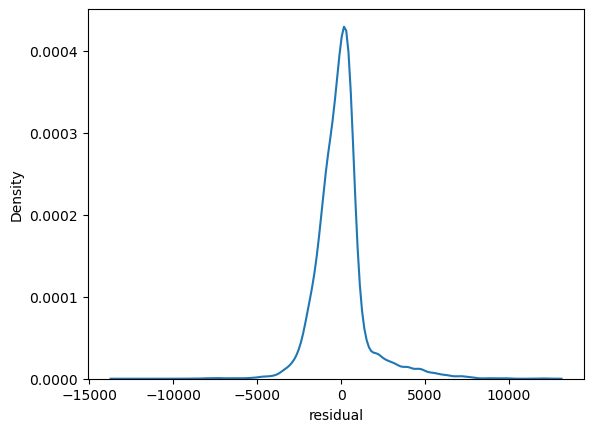

In [14]:
# 11
sns.kdeplot(data=final, x='residual')